In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
io = r'附件2上网业务用户满意度数据.xlsx'

data = pd.read_excel(io,header = [0],sheet_name = 'Sheet1')
data.head()
print(data.isnull().sum())
print(data.duplicated().sum())
print(data.shape)
print([column for column in data])

用户                0
手机上网整体满意度         0
网络覆盖与信号强度         0
手机上网速度            0
手机上网稳定性           0
               ... 
近3个月平均消费（元）       0
本年累计消费（元）         0
码号资源-激活时间      4150
码号资源-发卡时间      4004
客户星级标识            0
Length: 125, dtype: int64
0
(7020, 125)
['用户', '手机上网整体满意度', '网络覆盖与信号强度', '手机上网速度', '手机上网稳定性', '居民小区', '办公室', '高校', '商业街', '地铁', '农村', '高铁', '其他，请注明', '场景备注数据', '网络信号差/没有信号', '显示有信号上不了网', '上网过程中网络时断时续或时快时慢', '手机上网速度慢', '其他，请注明.1', '现象备注数据', '看视频卡顿', '打游戏延时大', '打开网页或APP图片慢', '下载速度慢', '手机支付较慢', '其他，请注明.2', 'APP大类备注', '爱奇艺', '优酷', '腾讯视频', '芒果TV', '搜狐视频', '抖音', '快手', '火山', '咪咕视频', '其他，请注明.3', 'APP小类视频备注', '全部都卡顿', '和平精英', '王者荣耀', '穿越火线', '梦幻西游', '龙之谷', '梦幻诛仙', '欢乐斗地主', '部落冲突', '炉石传说', '阴阳师', '其他，请注明.4', 'APP小类游戏备注', '全部游戏都卡顿', '微信', '手机QQ', '淘宝', '京东', '百度', '今日头条', '新浪微博', '拼多多', '其他，请注明.5', 'APP小类上网备注', '全部网页或APP都慢', '上网质差次数', '脱网次数', '重定向次数', '2G驻留时长', '微信质差次数', '王者荣耀质差次数', '高单价超套客户（集团）', '高频高额超套客户（集团）', '套外流量（MB）', '套外流量费（元）', '是否全月漫游用户', '是否不限量套餐到达用户', '年龄', '性别', '王者荣耀

# 删除与预测集无关数据

In [2]:
data=data.drop(list(data)[77:107],axis=1)

In [3]:
data=data.drop(['其他，请注明.5','王者荣耀质差次数','高单价超套客户（集团）','高频高额超套客户（集团）','是否全月漫游用户','年龄'], axis=1)

In [4]:
data=data.drop(list(data)[75:82],axis=1)

In [5]:
data=data.drop(['码号资源-激活时间','码号资源-发卡时间','本年累计消费（元）','近3个月平均消费（剔除通信账户支付）'], axis=1)

In [6]:
data.loc[:,'近3个月平均消费（元）'].describe()

count    7020.000000
mean       76.825705
std        63.791559
min         0.000000
25%        34.000000
50%        59.670000
75%       102.050000
max       724.030000
Name: 近3个月平均消费（元）, dtype: float64

In [7]:
data.loc[:,'当月GPRS资源使用量（GB）'].describe()

count    7020.000000
mean       21.098467
std        25.220009
min         0.000000
25%         5.210050
50%        13.232450
75%        27.725125
max       344.777500
Name: 当月GPRS资源使用量（GB）, dtype: float64

# 删除大量缺失值所在列

In [8]:
data=data.drop(['场景备注数据','现象备注数据','APP大类备注','APP小类视频备注','APP小类游戏备注','APP小类上网备注'], axis=1)


# 填充空值为零数据

In [9]:
data.loc[:,('上网质差次数','脱网次数','微信质差次数','重定向次数','2G驻留时长','终端品牌类型','终端品牌')]=data.loc[:,('上网质差次数','脱网次数','微信质差次数','重定向次数','2G驻留时长','终端品牌类型','终端品牌')].fillna(0)

In [10]:
a=data.isnull().sum()
a = pd.DataFrame(a)

In [11]:
data.shape

(7020, 72)

# 编码转化

In [12]:
from sklearn.preprocessing import OrdinalEncoder
data.iloc[:,5:56]=OrdinalEncoder().fit_transform(data.iloc[:,5:56])

C:\Users\白小帅\AppData\Local\Temp\ipykernel_8268\531884588.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,5:56]=OrdinalEncoder().fit_transform(data.iloc[:,5:56])


# 将数字转化为字符

In [13]:
d=data.loc[:,'终端品牌']
for i in range(7020):
    d.iloc[i]=str(d.iloc[i])
    

C:\Users\白小帅\AppData\Local\Temp\ipykernel_8268\1099961786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.iloc[i]=str(d.iloc[i])


In [14]:
d=data.loc[:,'终端品牌类型']
for i in range(7020):
    d.iloc[i]=str(d.iloc[i])

C:\Users\白小帅\AppData\Local\Temp\ipykernel_8268\2031632004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.iloc[i]=str(d.iloc[i])


In [15]:
data.loc[:,['是否不限量套餐到达用户','终端品牌','是否5G网络客户','客户星级标识','性别','终端品牌类型']]=OrdinalEncoder().fit_transform(data.loc[:,['是否不限量套餐到达用户','终端品牌','是否5G网络客户','客户星级标识','性别','终端品牌类型']])

C:\Users\白小帅\AppData\Local\Temp\ipykernel_8268\1928236234.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,['是否不限量套餐到达用户','终端品牌','是否5G网络客户','客户星级标识','性别','终端品牌类型']]=OrdinalEncoder().fit_transform(data.loc[:,['是否不限量套餐到达用户','终端品牌','是否5G网络客户','客户星级标识','性别','终端品牌类型']])


data.to_excel('test3.xlsx', sheet_name='Sheet1', index=False)

In [16]:
data.shape

(7020, 72)

# 特征替换，将附件二重定向次数与2G驻留时长替换为附件四中是否遇到网络问题（规则为，如附加二中用户存在重定向或2G驻留问题，即认定存在网络问题）

In [17]:
a=data.loc[:,'重定向次数']
b=data.loc[:,'2G驻留时长']
d=a+b
for i in range(7020):
    if d.iloc[i] ==0:
        d.iloc[i]=1
    else:
        d.iloc[i]=2

In [18]:
data=data.drop(['重定向次数','2G驻留时长'], axis=1)

In [19]:
data = pd.concat([data, pd.DataFrame(columns=['是否遇到网络问题'])])

In [20]:
data.loc[:,'是否遇到网络问题']= d

C:\Users\白小帅\AppData\Local\Temp\ipykernel_8268\2666148713.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,'是否遇到网络问题']= d


# 将训练集与预测集构建一致

In [21]:
data=data.rename(columns={"近3个月平均消费（元）": "当月ARPU"})

In [22]:
mid = data['是否遇到网络问题']  
data.pop('是否遇到网络问题') 
data.insert(0, '是否遇到网络问题', mid) 
mid = data['脱网次数']  
data.pop('脱网次数') 
data.insert(0, '脱网次数', mid) 
mid = data['是否不限量套餐到达用户']  
data.pop('是否不限量套餐到达用户') 
data.insert(0, '是否不限量套餐到达用户', mid) 
mid = data['性别']  
data.pop('性别') 
data.insert(0, '性别', mid) 
mid = data['是否5G网络客户']  
data.pop('是否5G网络客户') 
data.insert(0, '是否5G网络客户', mid) 
mid = data['当月ARPU']  
data.pop('当月ARPU') 
data.insert(0, '当月ARPU', mid) 
mid = data['当月GPRS资源使用量（GB）']  
data.pop('当月GPRS资源使用量（GB）') 
data.insert(0, '当月GPRS资源使用量（GB）', mid) 

# 嵌入法特征选择

In [23]:
data1=data.copy()
data1=data1.drop(['用户', '手机上网速度','网络覆盖与信号强度','手机上网稳定性'], axis=1)
Ytrain=data1['手机上网整体满意度'].values
Xtrain=data1.drop('手机上网整体满意度', axis = 1).values


In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC


In [25]:
RFC_ = RFC(n_estimators=100,random_state=0)#随机森林实例化


In [26]:
(RFC_.fit(Xtrain,Ytrain).feature_importances_).max()

0.10219703475103506

In [27]:
threshold = np.linspace(0,(RFC_.fit(Xtrain,Ytrain).feature_importances_).max(),100)
threshold

array([0.        , 0.00103229, 0.00206459, 0.00309688, 0.00412917,
       0.00516147, 0.00619376, 0.00722605, 0.00825835, 0.00929064,
       0.01032293, 0.01135523, 0.01238752, 0.01341981, 0.01445211,
       0.0154844 , 0.01651669, 0.01754899, 0.01858128, 0.01961357,
       0.02064587, 0.02167816, 0.02271045, 0.02374275, 0.02477504,
       0.02580733, 0.02683963, 0.02787192, 0.02890421, 0.02993651,
       0.0309688 , 0.03200109, 0.03303338, 0.03406568, 0.03509797,
       0.03613026, 0.03716256, 0.03819485, 0.03922714, 0.04025944,
       0.04129173, 0.04232402, 0.04335632, 0.04438861, 0.0454209 ,
       0.0464532 , 0.04748549, 0.04851778, 0.04955008, 0.05058237,
       0.05161466, 0.05264696, 0.05367925, 0.05471154, 0.05574384,
       0.05677613, 0.05780842, 0.05884072, 0.05987301, 0.0609053 ,
       0.0619376 , 0.06296989, 0.06400218, 0.06503448, 0.06606677,
       0.06709906, 0.06813136, 0.06916365, 0.07019594, 0.07122824,
       0.07226053, 0.07329282, 0.07432512, 0.07535741, 0.07638

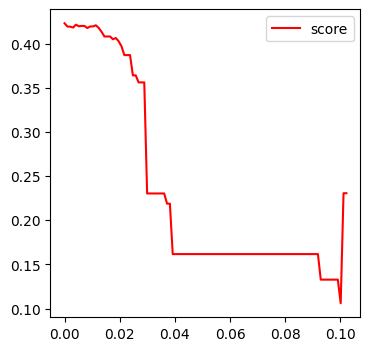

0


In [28]:
from sklearn.model_selection import cross_val_score
score=[]
for i in threshold :
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(Xtrain,Ytrain)
    once= cross_val_score(RFC_,X_embedded,Ytrain,cv=5).mean()
    score.append(once)
p=plt.figure(figsize=(4,4))
plt.plot(threshold,score,color='red',label='score')
plt.legend()
plt.show()
print(score.index(max(score)))

In [29]:
p.savefig(fname='手机上网整体满意度-嵌入法寻找最佳阈值的学习曲线.png',dpi='figure')

In [30]:
X_embedded = SelectFromModel(RFC_,threshold=threshold[score.index(max(score))]).fit_transform(Xtrain,Ytrain)

X_embedded.shape#筛选后特征数

(7020, 66)

In [31]:
from sklearn.model_selection import cross_val_score
once= cross_val_score(RFC_,X_embedded,Ytrain,cv=5).mean()


In [32]:
once

0.4230769230769231

In [33]:
x=pd.concat([pd.DataFrame(RFC_.fit(Xtrain,Ytrain).feature_importances_.reshape(1,66)),pd.DataFrame(Xtrain)],axis=0)

In [34]:
importance=(RFC_.fit(Xtrain,Ytrain).feature_importances_)
idx_features = (-importance).argsort()[:X_embedded.shape[1]]
idx_features.sort()
X_train=pd.DataFrame(Xtrain).iloc[:,idx_features]

# 构建预测集

In [35]:
ip = r'predict2.xlsx'
predict = pd.read_excel(ip,header = [0],sheet_name = 'Sheet1')
predict.head()

,当月GPRS资源使用量（GB）,当月ARPU,是否5G网络客户,性别,是否不限量套餐到达用户,脱网次数,是否遇到网络问题,居民小区,办公室,高校,...,拼多多,全部网页或APP都慢,上网质差次数,微信质差次数,套外流量（MB）,套外流量费（元）,终端品牌,终端品牌类型,当月MOU,客户星级标识
0,4.088200,0.0,1,2,0,8,2,0,0,0,...,0,0,0,0,0.0,0.0,11,166,2,2
1,4.643740,0.0,1,0,0,43,1,0,0,0,...,0,0,0,0,0.0,0.0,11,163,6,1
2,41.511201,0.0,1,1,0,1,1,0,1,0,...,0,0,0,0,0.0,0.0,9,77,232,2
3,10.175967,0.0,1,0,0,6,2,0,0,0,...,0,0,0,0,0.0,0.0,15,345,2,2
4,10.007606,0.0,1,0,0,27,1,1,0,0,...,0,0,0,0,0.0,0.0,19,34,195,2


In [36]:
predict=pd.DataFrame(predict).iloc[:,idx_features]

# 构建随机森林模型

In [37]:
from sklearn import tree
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_train,Ytrain,test_size=0.3)

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=14,criterion="gini",max_depth=30,min_samples_leaf=10)
forest.fit(Xtrain,Ytrain)
score = forest.score(Xtest,Ytest)#返回准确度

In [39]:
score

0.4358974358974359

In [40]:
forest.score(Xtrain,Ytrain)

0.5594220594220595

In [41]:
result_forest = forest.predict(predict.values)

In [42]:
pd.DataFrame(result_forest).to_excel('手机上网整体满意度_随机森林_predictresult.xlsx', sheet_name='Sheet1', index=False)

# 构建神经网络模型

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
standard_train=sc.transform(Xtrain)
standard_test=sc.transform(Xtest)


In [44]:
from sklearn.neural_network import MLPClassifier
# solver{‘lbfgs’, ‘sgd’, ‘adam’} ‘adam’在相对较大的数据集上效果比较好（几千个样本或者更多），对小数据集来说，lbfgs收敛更快效果也更好。
mlp=MLPClassifier(solver='adam',alpha=1e-5,hidden_layer_sizes=(5,5),max_iter=4000)
mlp.fit(standard_train,Ytrain)
result_mlp=mlp.predict(predict.values)
#print("测试集合的y值：",list(Y_test))
#print("神经网络预测的的y值：",list(result))
print("测试集预测的正确率为：",mlp.score(standard_test,Ytest))
print("训练集的正确率为：",mlp.score(standard_train,Ytrain))

测试集预测的正确率为： 0.43637226970560306
训练集的正确率为： 0.464997964997965


In [45]:
pd.DataFrame(result_mlp).to_excel('手机上网整体满意度_神经网络_predictresult.xlsx', sheet_name='Sheet1', index=False)

In [46]:
result_mlp

array([1., 1., 6., ..., 6., 1., 7.])

# 构建XGBoost算法模型

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ytrain = le.fit_transform(Ytrain)
Ytest = le.fit_transform(Ytest)

In [48]:
from xgboost.sklearn import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(Xtrain.values,Ytrain)
xgbc.score(Xtest.values,Ytest)

0.4226020892687559

In [49]:
xgbc.score(Xtrain.values,Ytrain)

0.9513634513634514

In [50]:
result_xgbc=xgbc.predict(predict.values)+1

In [51]:
pd.DataFrame(result_xgbc).to_excel('手机上网整体满意度_XGBoost_predictresult.xlsx', sheet_name='Sheet1', index=False)

In [52]:
Ytrain=data1['手机上网整体满意度'].values
a=data1.drop('手机上网整体满意度', axis = 1)
a=pd.DataFrame(a)
a=a.iloc[:,idx_features]
Xtrain=a.values
test_forest=forest.predict(Xtrain)
test_mlp=mlp.predict(Xtrain)
test_xgbc=xgbc.predict(Xtrain)+1


In [53]:
import pandas
allreuslt= pd.concat([pd.DataFrame(result_forest),pd.DataFrame(result_mlp),pd.DataFrame(result_xgbc)],axis=1) 
alltrain= pd.concat([pd.DataFrame(test_forest),pd.DataFrame(test_mlp),pd.DataFrame(test_xgbc)],axis=1) 

In [54]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(alltrain,Ytrain,test_size=0.3)

# 构建融合模型

In [55]:
from sklearn.linear_model import LinearRegression
#线性回归
lr=LinearRegression().fit(Xtrain,Ytrain)
print(lr.score(Xtrain,Ytrain))
print(lr.score(Xtest,Ytest))

0.7260437309261234
0.7240912048643819


In [56]:
a=lr.predict(allreuslt)

In [57]:
a

array([9.47327163, 9.47327163, 9.31922216, ..., 9.51224408, 9.47327163,
       9.52003857])

In [58]:
a=a.round(0)

In [59]:
pd.DataFrame(a).to_excel('手机上网整体满意度_predict_result.xlsx', sheet_name='Sheet1', index=False)